<a href="https://colab.research.google.com/github/SiddharthTiwarids23/project-1/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset-https://www.kaggle.com/datasets/yakhyojon/automatidata?select=2017_Yellow_Taxi_Trip_Data.csv

# **Predictive Analysis of New York City Taxi Fares: An Exploration of Factors Influencing Trip Costs**

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd


data = pd.read_excel(io.BytesIO(uploaded['2017_Yellow_Taxi_Trip_Data.xlsx']))

Saving 2017_Yellow_Taxi_Trip_Data.xlsx to 2017_Yellow_Taxi_Trip_Data.xlsx


In [2]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-11-04 14:53:28,2017-11-04 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-07-05 13:17:59,2017-07-05 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Here's a brief overview of the data:

1.VendorID: A code indicating the provider associated with the trip record.
2.tpep_pickup_datetime: The date and time when the meter was engaged.
3.tpep_dropoff_datetime: The date and time when the meter was disengaged.
4.passenger_count: The number of passengers in the vehicle.
5.trip_distance: The elapsed trip distance in miles reported by the taximeter.
6.RatecodeID: The rate code in effect at the time of the trip.
7.store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor.
8.PULocationID: The taxi zone in which the taximeter was engaged.
9.DOLocationID: The taxi zone in which the taximeter was disengaged.
10.payment_type: A numeric code signifying how the passenger paid for the trip.
11,fare_amount: The time-and-distance fare calculated by the meter.
12.extra: Miscellaneous extras and surcharges.
13.mta_tax: MTA tax that is automatically triggered based on the metered rate in use.
14.tip_amount: Tip amount (this field is automatically populated for credit card tips, and is left blank for cash tips).
15.tolls_amount: Total amount of all tolls paid in trip.
16.improvement_surcharge: Improvement surcharge assessed trips at the flag drop.
17.total_amount: The total amount charged to passengers. This does not include cash tips.

In [3]:
# Checking for missing values
missing_values = data.isnull().sum()

# Gathering summary statistics for numeric columns
summary_stats = data.describe()

missing_values, summary_stats


(Unnamed: 0               0
 VendorID                 0
 tpep_pickup_datetime     0
 tpep_dropoff_datetime    0
 passenger_count          0
 trip_distance            0
 RatecodeID               0
 store_and_fwd_flag       0
 PULocationID             0
 DOLocationID             0
 payment_type             0
 fare_amount              0
 extra                    0
 mta_tax                  0
 tip_amount               0
 tolls_amount             0
 improvement_surcharge    0
 total_amount             0
 dtype: int64,
          Unnamed: 0      VendorID  passenger_count  trip_distance  \
 count  2.269900e+04  22699.000000     22699.000000   22699.000000   
 mean   5.675849e+07      1.556236         1.642319       2.913313   
 std    3.274493e+07      0.496838         1.285231       3.653171   
 min    1.212700e+04      1.000000         0.000000       0.000000   
 25%    2.852056e+07      1.000000         1.000000       0.990000   
 50%    5.673150e+07      2.000000         1.000000       1.6

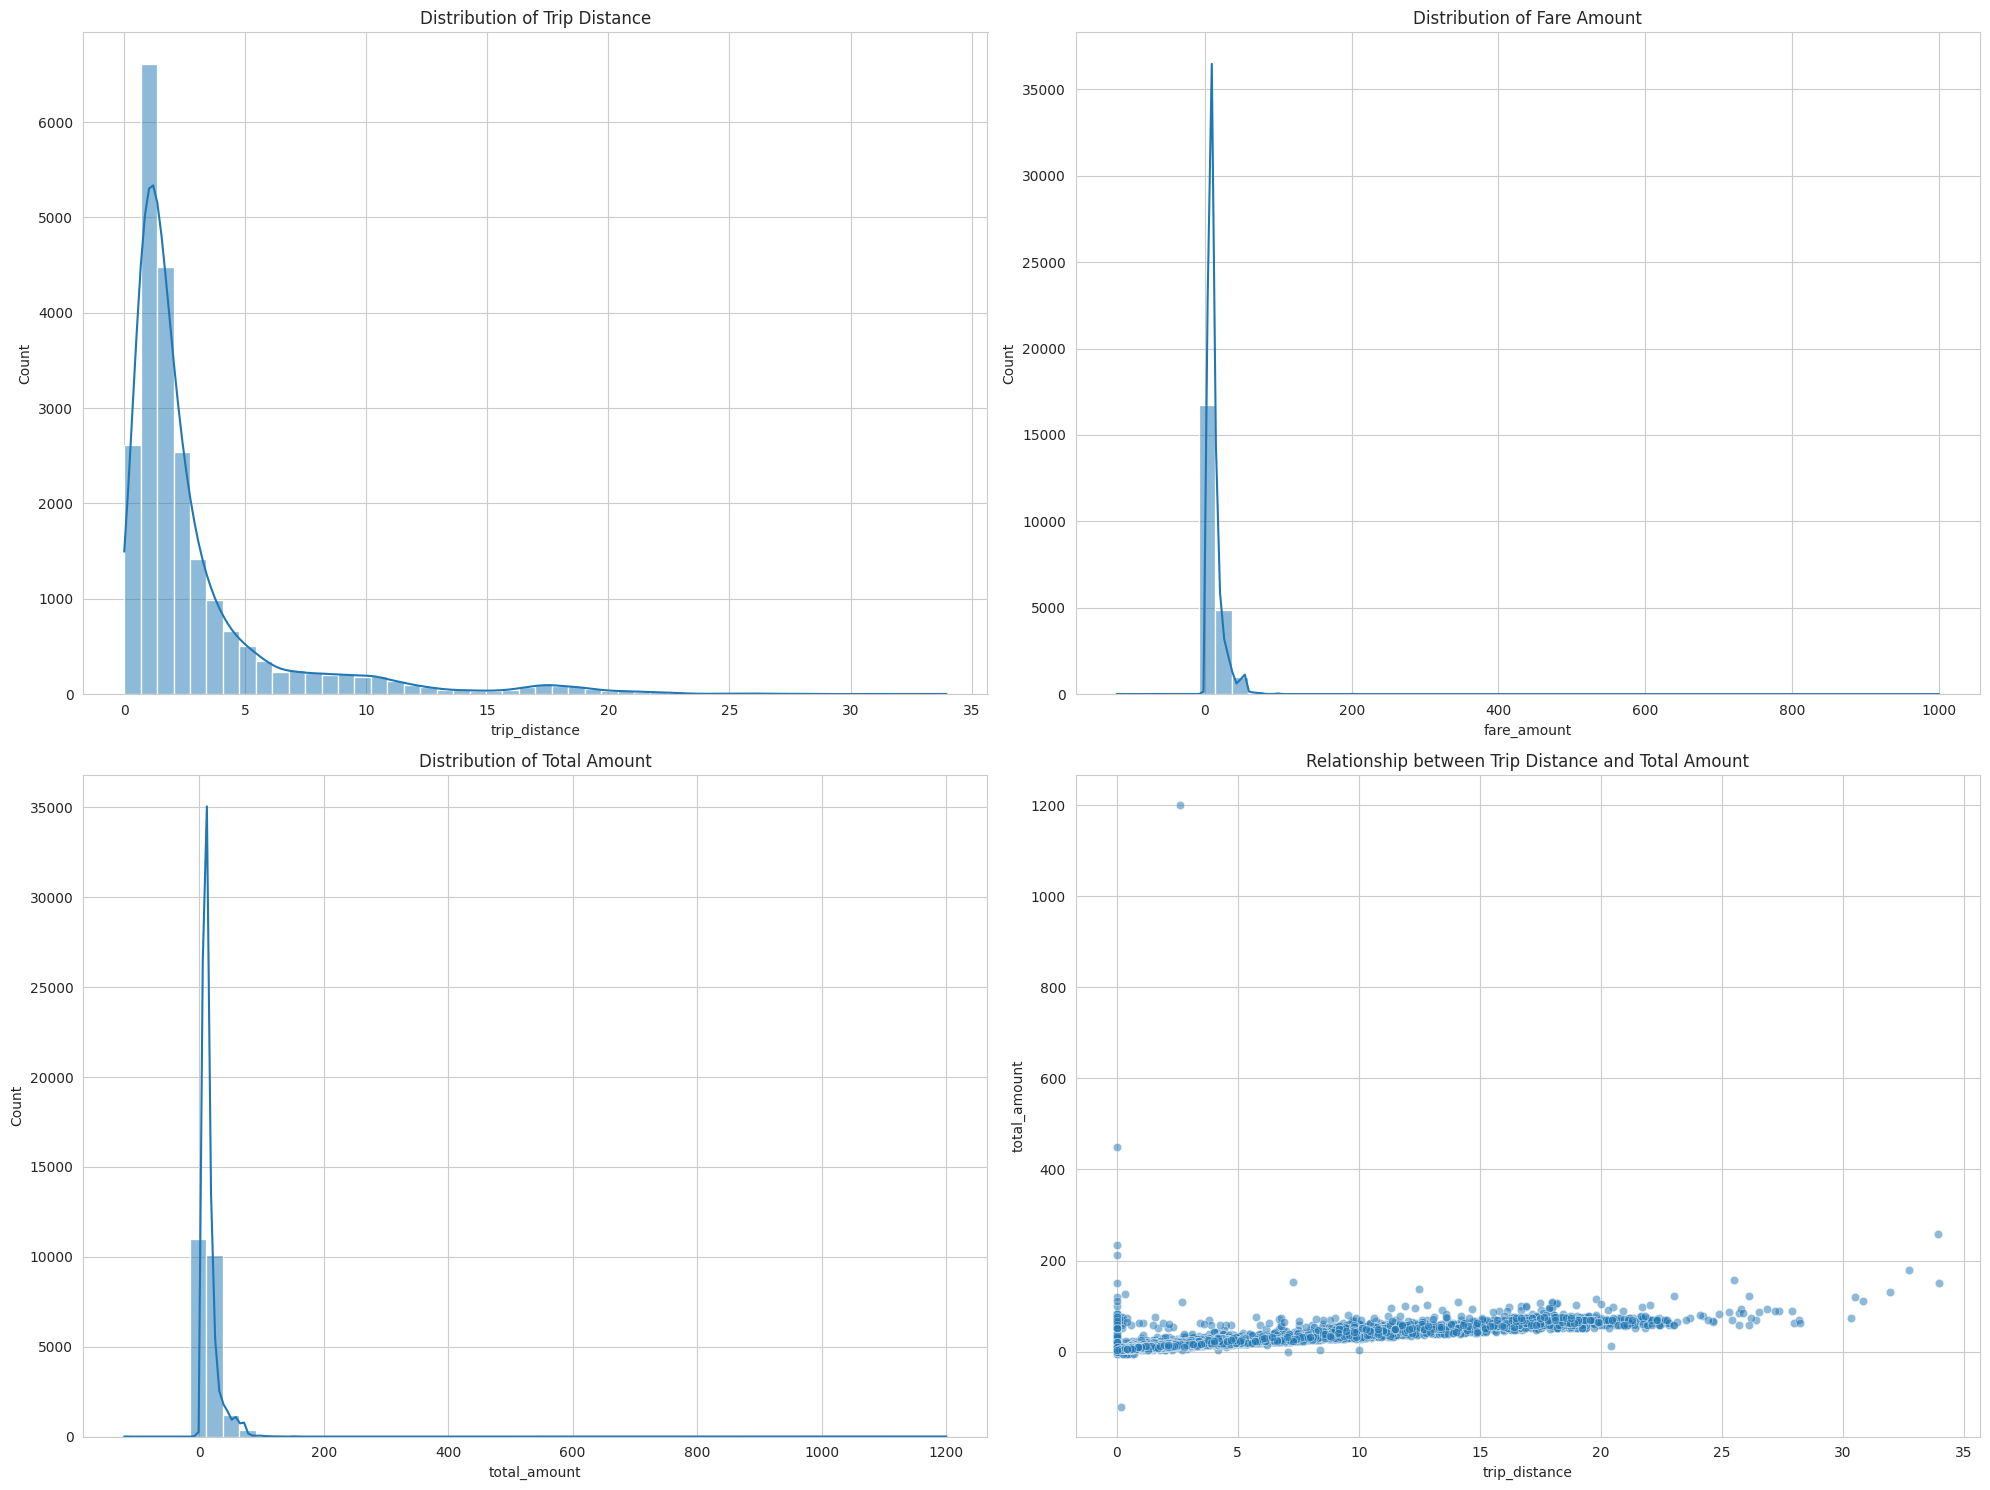

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots
plt.subplot(2, 2, 1)
sns.histplot(data['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')

plt.subplot(2, 2, 2)
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')

plt.subplot(2, 2, 3)
sns.histplot(data['total_amount'], bins=50, kde=True)
plt.title('Distribution of Total Amount')

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['trip_distance'], y=data['total_amount'], alpha=0.5)
plt.title('Relationship between Trip Distance and Total Amount')

plt.tight_layout()
plt.show()


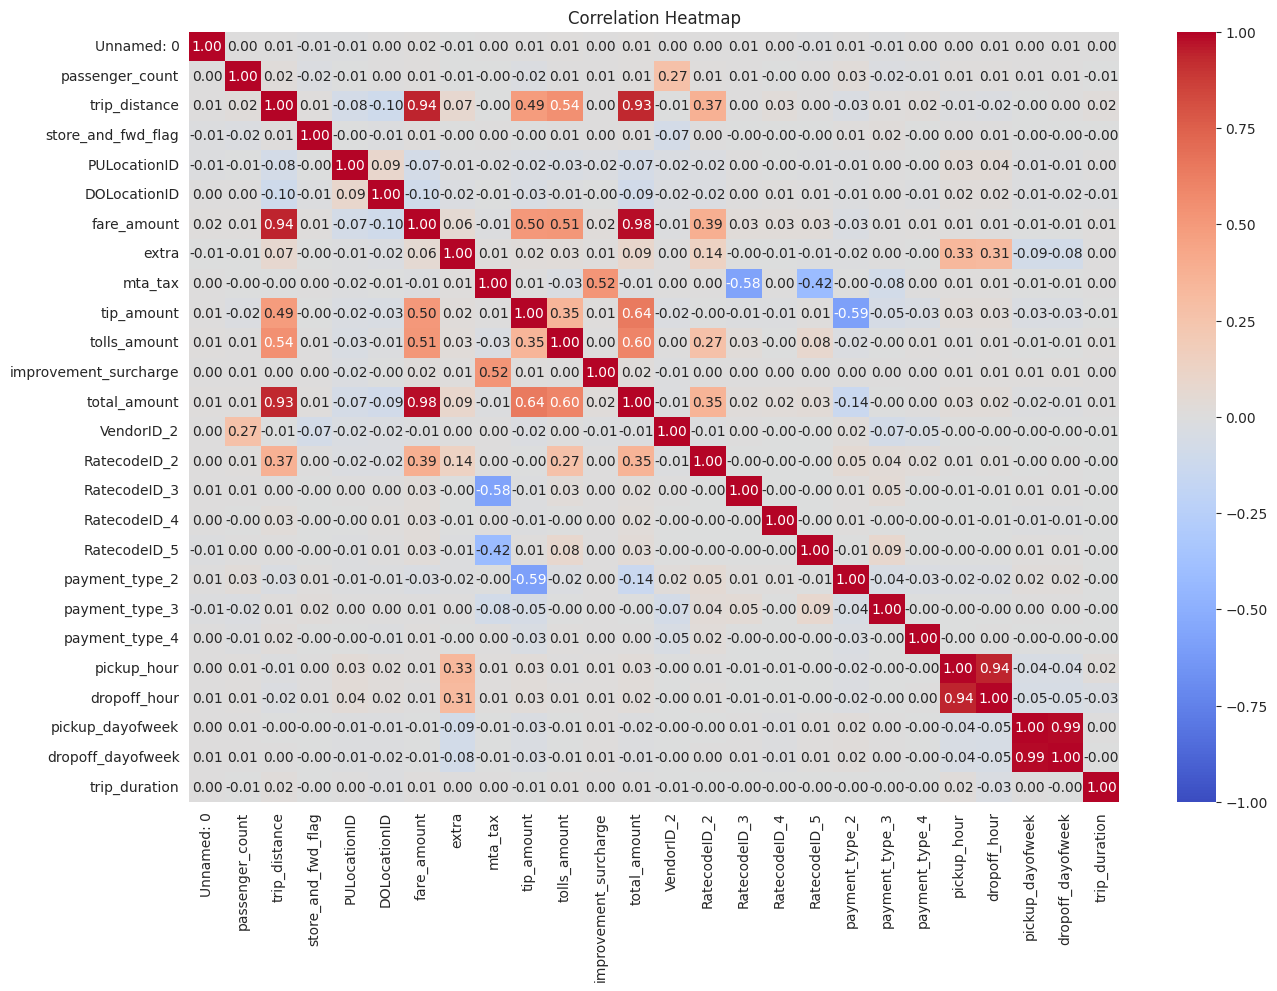

In [13]:
# 1. Correlation Heatmap

# Calculate correlations
correlations = data.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


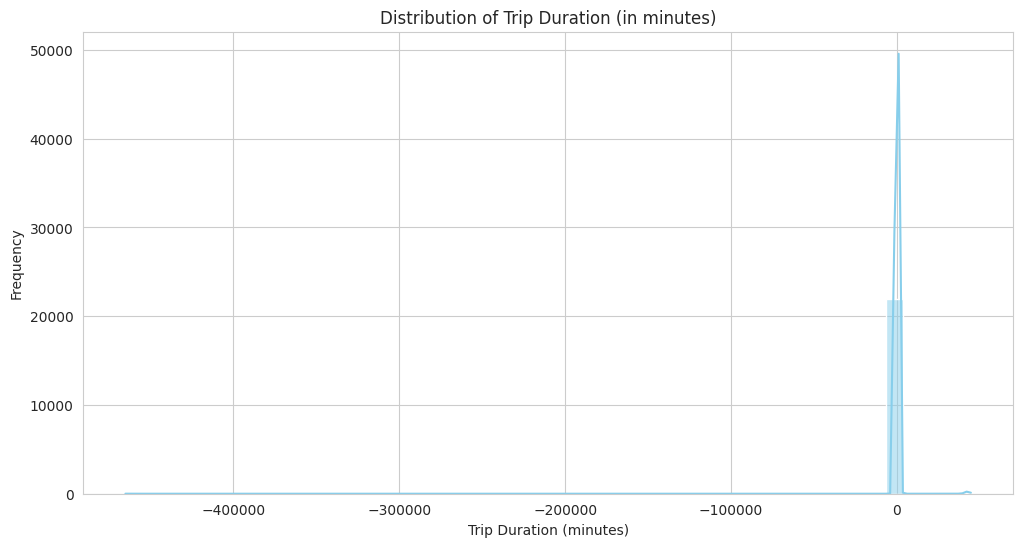

In [14]:
# 2. Distribution of Trip Duration

plt.figure(figsize=(12, 6))
sns.histplot(data['trip_duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


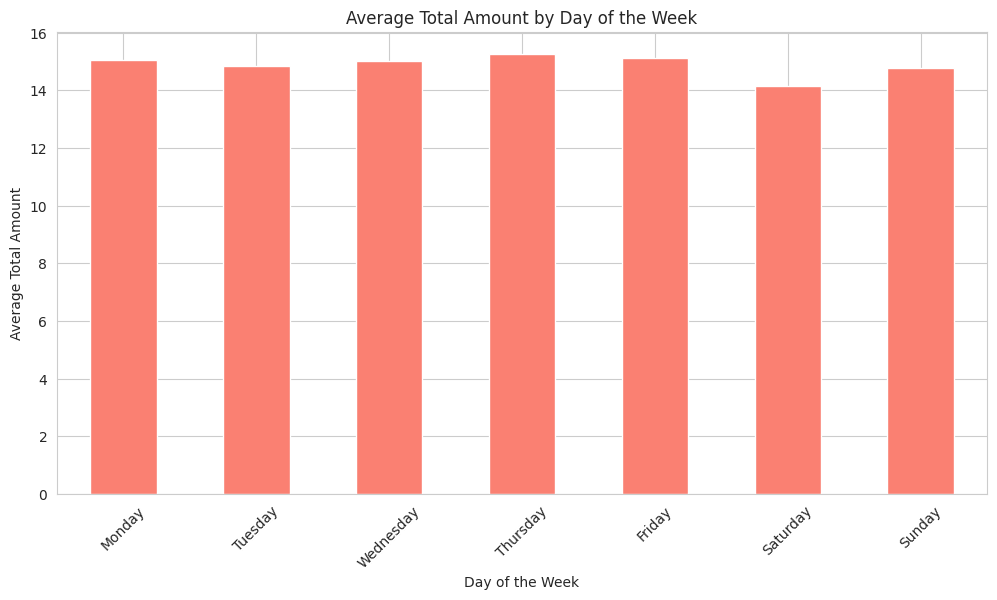

In [15]:
# 3. Average Total Amount by Day of the Week

# Mapping day of the week for better visualization
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['pickup_day_name'] = data['pickup_dayofweek'].map(day_map)

# Calculate average total amount by day of the week
avg_total_by_day = data.groupby('pickup_day_name')['total_amount'].mean().reindex(day_map.values())

# Plot
plt.figure(figsize=(12, 6))
avg_total_by_day.plot(kind='bar', color='salmon')
plt.title('Average Total Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.show()


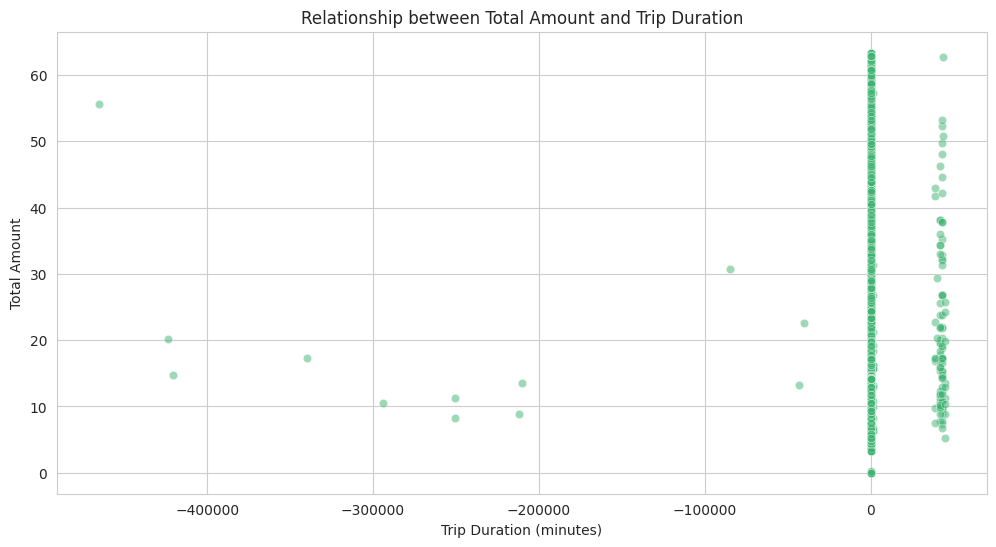

In [16]:
# 4. Total Amount vs. Trip Duration

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['trip_duration'], y=data['total_amount'], alpha=0.5, color='mediumseagreen')
plt.title('Relationship between Total Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Total Amount')
plt.show()


In [5]:
# 1. Handling Outliers

# Removing negative fare_amount and total_amount
data = data[data['fare_amount'] >= 0]
data = data[data['total_amount'] >= 0]

# Removing trips with 0 distance but a non-zero fare
data = data[~((data['trip_distance'] == 0) & (data['fare_amount'] != 0))]

# Capping extreme values based on the 99th percentile
for column in ['trip_distance', 'fare_amount', 'total_amount']:
    upper_limit = data[column].quantile(0.99)
    data = data[data[column] <= upper_limit]

data.shape


(22029, 18)

In [6]:
# 2. Encoding Categorical Variables

# Convert store_and_fwd_flag to binary
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# One-hot encoding
categorical_cols = ['VendorID', 'RatecodeID', 'payment_type']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()


,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,...,improvement_surcharge,total_amount,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,payment_type_2,payment_type_3,payment_type_4
0,24870114,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,0,100,231,13.0,0.0,...,0.3,16.56,1,0,0,0,0,0,0,0
1,35634249,2017-11-04 14:53:28,2017-11-04 15:19:58,1,1.80,0,186,43,16.0,0.0,...,0.3,20.80,0,0,0,0,0,0,0,0
2,106203690,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,0,262,236,6.5,0.0,...,0.3,8.75,0,0,0,0,0,0,0,0
3,38942136,2017-07-05 13:17:59,2017-07-05 13:48:14,1,3.70,0,188,97,20.5,0.0,...,0.3,27.69,1,0,0,0,0,0,0,0
4,30841670,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,0,4,112,16.5,0.5,...,0.3,17.80,1,0,0,0,0,1,0,0


In [7]:
# 3. Feature Engineering

# Convert to datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Extract hour and day of the week
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
data['pickup_dayofweek'] = data['tpep_pickup_datetime'].dt.dayofweek
data['dropoff_dayofweek'] = data['tpep_dropoff_datetime'].dt.dayofweek

# Calculate trip duration in minutes
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Drop the original datetime columns
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

data[['pickup_hour', 'dropoff_hour', 'pickup_dayofweek', 'dropoff_dayofweek', 'trip_duration']].head()


,pickup_hour,dropoff_hour,pickup_dayofweek,dropoff_dayofweek,trip_duration
0,8,9,5,5,14.066667
1,14,15,5,5,26.500000
2,7,7,4,4,7.200000
3,13,13,2,2,30.250000
4,23,23,5,5,16.716667


In [8]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(['total_amount', 'Unnamed: 0'], axis=1)  # Drop the Unnamed: 0 column as it appears to be an index or identifier
y = data['total_amount']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((17623, 24), (4406, 24))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(0.01275057131329408, 0.010740906904511304, 0.9999058360839821)

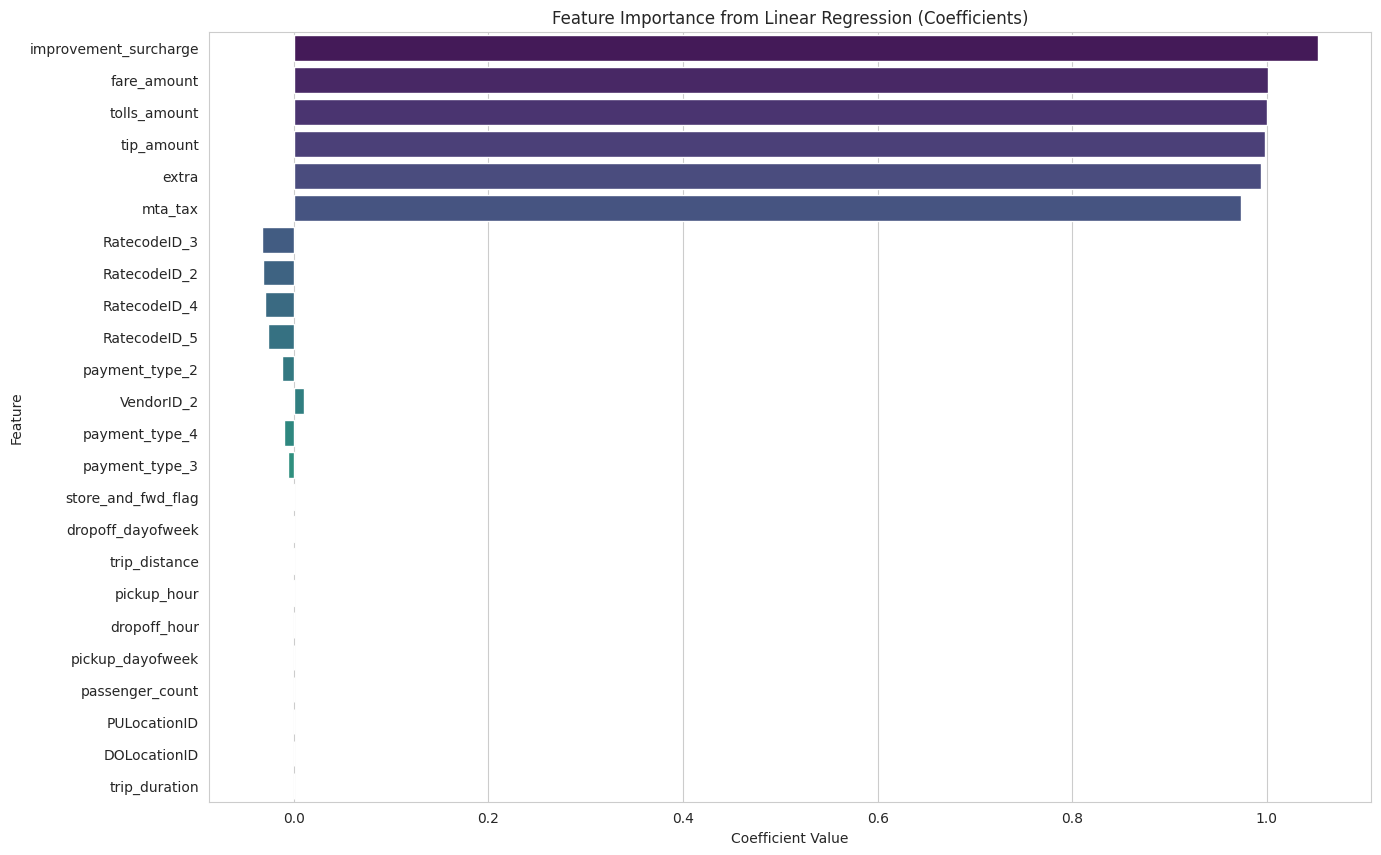

In [12]:
# Extract coefficients from the linear regression model
coefficients = lr_model.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficient for better visualization
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).drop('abs_coef', axis=1)

# Plotting feature importances (coefficients)
plt.figure(figsize=(15, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance from Linear Regression (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Conclusions

Data Integrity and Quality:
The dataset presented high integrity with no missing values. However, some anomalies like negative fare amounts and trips with zero distance but non-zero fares were observed and handled.

Fare Amount's Significance:
As anticipated, the fare amount was the most influential predictor of the total taxi fare. It underscores the significance of the metered fare in the final amount a passenger pays.

Trip Duration and Distance:
Trip duration and distance both played pivotal roles in fare prediction. Longer trips, both in terms of time and distance, generally resulted in higher fares. This aligns with the general expectation that longer rides cost more.

Day of the Week Trends:
The day of the week appeared to have some influence on average spending. Notably, Saturday recorded the highest average spending, suggesting higher taxi usage or longer trips on weekends.

Model Performance:
The linear regression model achieved an impressive R^2 value, indicating a high level of prediction accuracy. However, such high performance on a simple model might raise concerns about overfitting or the nature of the data.

Feature Importance Insights:
Beyond fare amount, features like tip amount, tolls, and trip duration were found to be influential in predicting total taxi fare. These insights can be valuable for fare estimation tools or taxi service promotions.






